In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

In [4]:
img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Lion_waiting_in_Namibia.jpg/1200px-Lion_waiting_in_Namibia.jpg"
response = requests.get(img_url)
img_data = response.content
img_array = np.frombuffer(img_data, np.uint8)
image_gray = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)
image_bgr = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

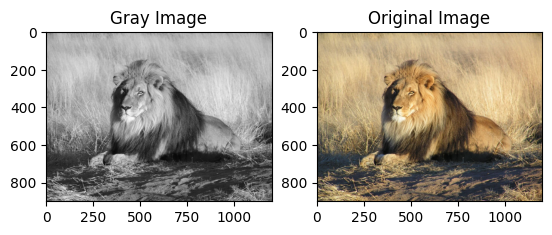

In [7]:
plt.subplot(1, 2, 1)
plt.title("Gray Image")
plt.imshow(image_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.show()

In [42]:
def custom_filter(image,kernel):
    img_h, img_w,  = image.shape
    kernel_h, kernel_w = kernel.shape
    
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2
    padded_image = np.pad(image, ((pad_h, pad_w), (pad_h, pad_w)), mode='constant', constant_values=0)
    return_image = image.copy()

    for i in range(pad_h, img_h + pad_h):
        for j in range(pad_w, img_w + pad_w):
            pixel_region = padded_image[i-pad_h:i+pad_h+1, j-pad_w: j+pad_w+1]
            return_image[i-pad_h, j-pad_w] = np.sum(pixel_region * kernel)
    return return_image

In [51]:
def compare_histograms(image1, image2):
    hist1 = cv2.calcHist([image1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([image2], [0], None, [256], [0, 256])
    plt.subplot(1, 2, 1)
    plt.title("Histogram of Image1")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.plot(hist1, color='black')
    plt.xlim([0, 256])

    # Plot the histogram of the filtered image
    plt.subplot(1, 2, 2)
    plt.title("Histogram of Image2")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.plot(hist2, color='black')
    plt.xlim([0, 256])

In [45]:
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9
lowpass_filtered = custom_filter(image_gray, kernel)

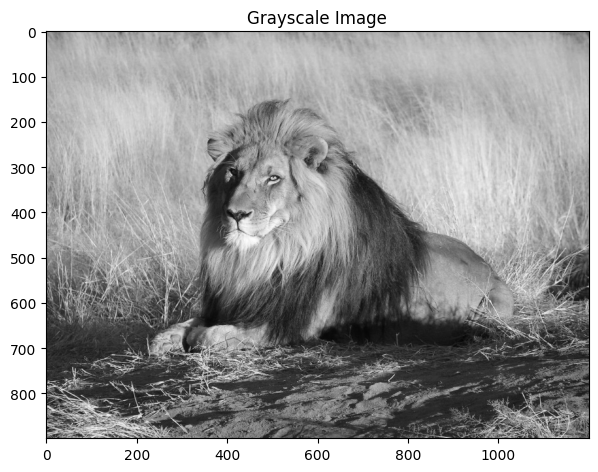

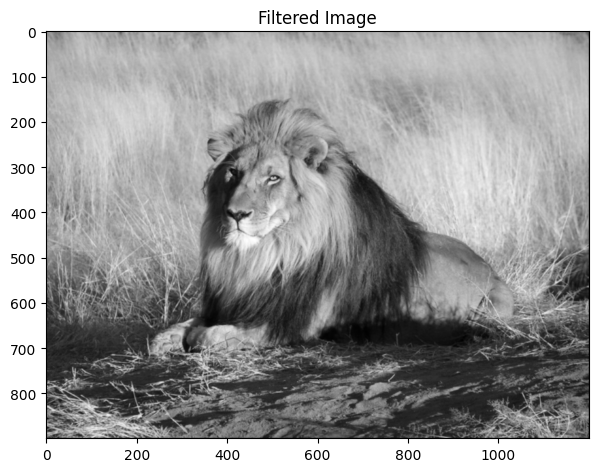

In [50]:
plt.figure(figsize=(7, 7)) 
plt.title("Grayscale Image")
plt.imshow(image_gray, cmap='gray')
plt.show()

plt.figure(figsize=(7, 7))  
plt.title("Filtered Image")
plt.imshow(lowpass_filtered, cmap='gray')
plt.show()

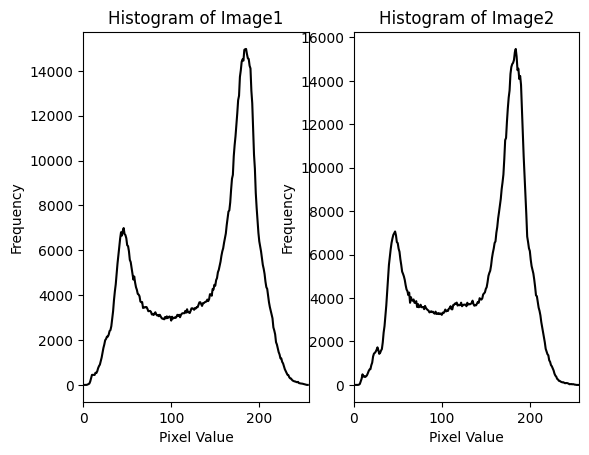

In [52]:
compare_histograms(image_gray, lowpass_filtered)

In [53]:
gaussian_kernel = np.array([
    [1,  4,  7,  4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1,  4,  7,  4, 1]
], dtype=np.float32)
gaussian_kernel /= np.sum(gaussian_kernel)

In [54]:
filtered_image = custom_filter(image_gray, gaussian_kernel)

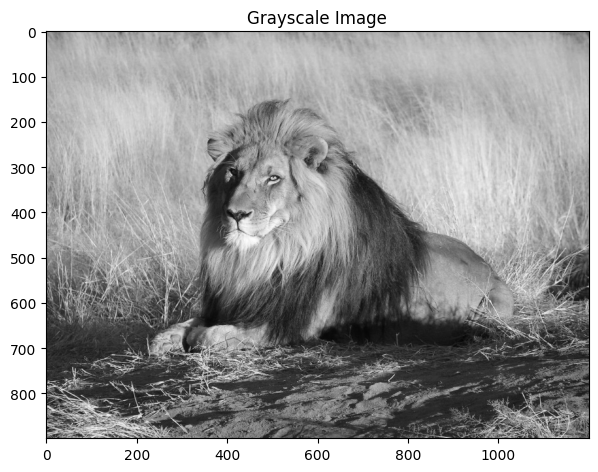

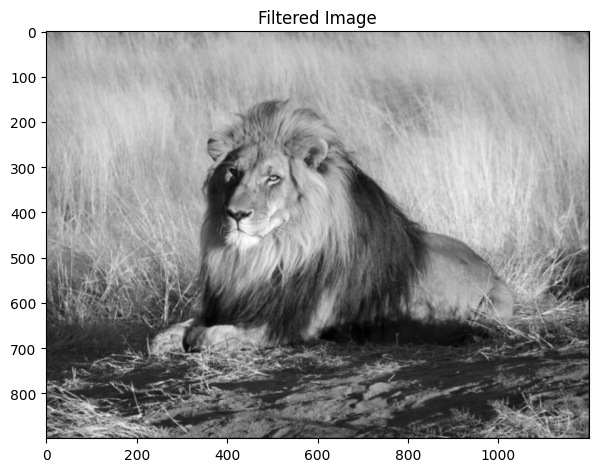

In [56]:
plt.figure(figsize=(7, 7)) 
plt.title("Grayscale Image")
plt.imshow(image_gray, cmap='gray')
plt.show()

plt.figure(figsize=(7, 7))  
plt.title("Filtered Image")
plt.imshow(filtered_image, cmap='gray')
plt.show()